In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Datetime for date manipulation
from datetime import datetime

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)
sns.set(style="ticks", color_codes=True)

%config Completer.use_jedi = False

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Scaling values
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [2]:
# Read in data into a dataframe 
conflict=pd.read_csv('../code/ged181.csv',low_memory=False)

# Display top of dataframe
conflict.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,side_a,side_b_new_id,gwnob,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
0,86148,1989,1,3,519,Sikh insurgents - Civilians,986,Sikh insurgents - Civilians,319,NaN,Sikh insurgents,1,NaN,Civilians,-1,Reuters 1/1/1989,NaN,NaN,NaN,police,4,Punjab State,Punjab State,NaN,30.916670,75.416670,POINT (75.416670 30.916670),174031,India,750,Asia,1,1,1989-01-01,1989-01-01,0,0,5,0,5,5,5
1,94814,1989,1,1,351,India:Punjab/Khalistan,775,Government of India - Sikh insurgents,141,750,Government of India,319,NaN,Sikh insurgents,-1,The Pioneer (Varanasi) 1/20/1990,NaN,NaN,NaN,NaN,4,Punjab State,Punjab State,NaN,30.916670,75.416670,POINT (75.416670 30.916670),174031,India,750,Asia,2,5,1989-01-01,1989-12-31,172,633,0,0,805,805,805
2,77563,1989,1,3,511,JVP - Civilians,978,JVP - Civilians,281,NaN,JVP,1,NaN,Civilians,-1,"Reuters, 13 Jan 1989",NaN,NaN,NaN,police,1,Deniyaya town,Southern,Matara,6.346100,80.551500,POINT (80.551500 6.346100),138762,Sri Lanka,780,Asia,1,1,1989-01-13,1989-01-13,0,0,0,0,0,0,2
3,17466,1989,1,2,4841,Supporters of IFP - Supporters of UDF,5451,Supporters of IFP - Supporters of UDF,620,NaN,Supporters of IFP,983,NaN,Supporters of UDF,-1,TRC Report,NaN,NaN,NaN,NaN,1,Mpumalanga town,Natal province,NaN,-29.812919,30.636458,POINT (30.636458 -29.812919),86822,South Africa,560,Africa,1,1,1989-01-18,1989-01-18,0,0,0,1,1,1,1
4,96586,1992,1,3,531,NDFB - Civilians,998,NDFB - Civilians,363,NaN,NDFB,1,NaN,Civilians,-1,SATP,NaN,NaN,NaN,SATP,3,Sonitpur district,Assam State,Sonitpur district,26.633333,92.800000,POINT (92.800000 26.633333),168306,India,750,Asia,1,1,1992-10-20,1992-10-20,0,0,4,0,4,4,4


In [3]:
# See the column data types and non-missing values
conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142902 entries, 0 to 142901
Data columns (total 42 columns):
id                   142902 non-null int64
year                 142902 non-null int64
active_year          142902 non-null int64
type_of_violence     142902 non-null int64
conflict_new_id      142902 non-null int64
conflict_name        142902 non-null object
dyad_new_id          142902 non-null int64
dyad_name            142902 non-null object
side_a_new_id        142902 non-null int64
gwnoa                110222 non-null object
side_a               142902 non-null object
side_b_new_id        142902 non-null int64
gwnob                742 non-null float64
side_b               142902 non-null object
number_of_sources    142902 non-null int64
source_article       142569 non-null object
source_office        37250 non-null object
source_date          37250 non-null object
source_headline      37250 non-null object
source_original      104568 non-null object
where_prec           14

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as gwnoa,source_office and source_data). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove Id and the features with 30% or less NaN values.

In [4]:
# df.count() does not include NaN values
df = conflict[[column for column in conflict if conflict[column].count() / len(conflict) >= 0.3]]
del df['id']
print("List of dropped columns:", end=" ")
for c in conflict.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')
conflict = df

List of dropped columns: id, gwnob, source_office, source_date, source_headline, 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1998c4e0>,
      dtype=object)

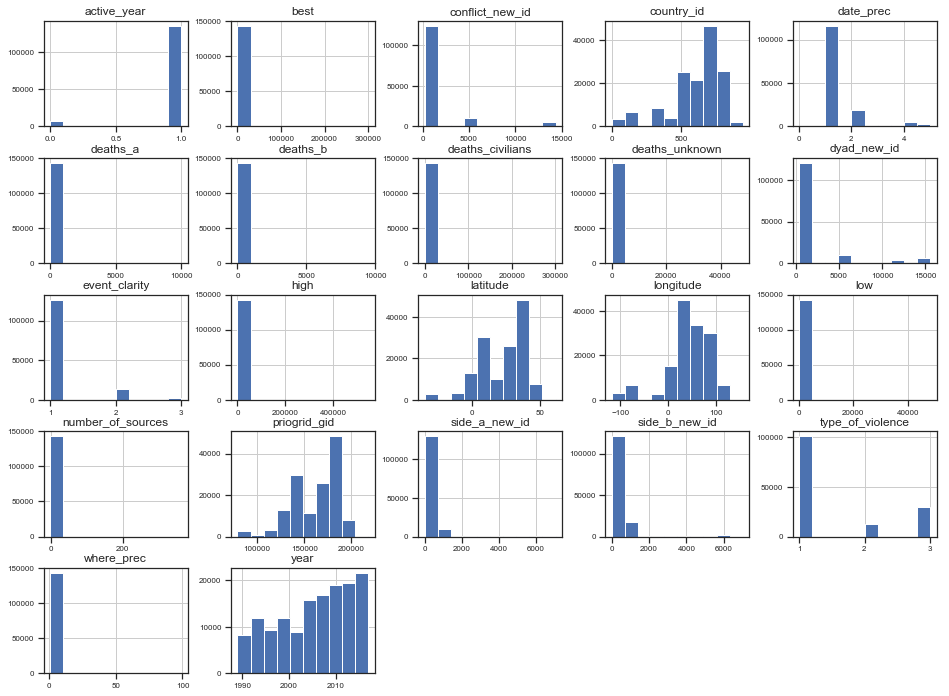

In [5]:
conflict.hist(figsize=(16, 12), bins=10, xlabelsize=8, ylabelsize=8)

Text(0.5, 1.05, 'Pearson Correlation of Features')

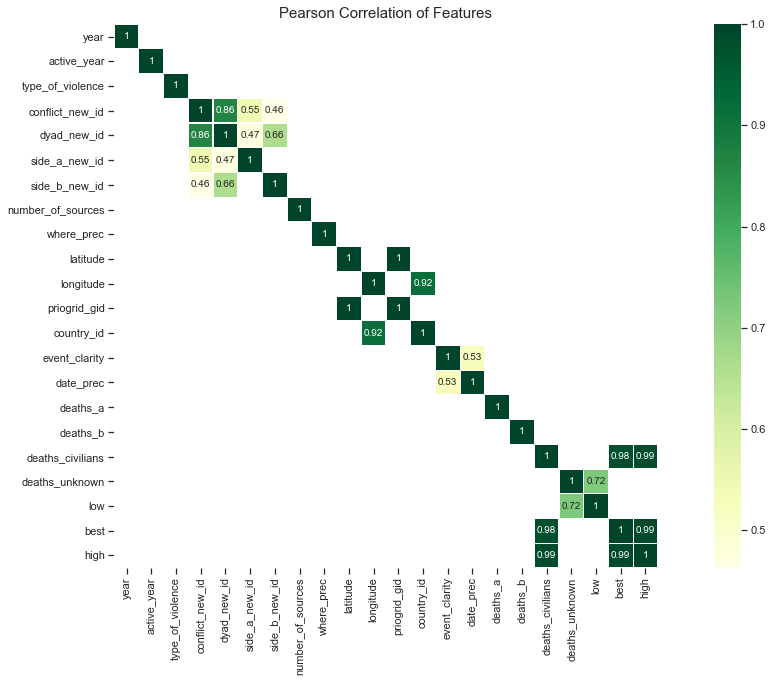

In [6]:
corr = conflict.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (20,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [7]:
conflict=conflict[['year','conflict_new_id','dyad_new_id','side_a_new_id','side_b_new_id',
                        'longitude','country_id','event_clarity','date_prec','deaths_civilians','best','active_year','type_of_violence','conflict_name','side_a','side_b','where_coordinates','country','region','event_clarity','date_prec','date_start','date_end','best']]
conflict_19_20=conflict[conflict.year > 1899].reset_index(drop=True)

conflict_19_20.head()

,year,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,longitude,country_id,event_clarity,date_prec,deaths_civilians,best,active_year,type_of_violence,conflict_name,side_a,side_b,where_coordinates,country,region,event_clarity,date_prec,date_start,date_end,best
0,1989,519,986,319,1,75.416670,750,1,1,5,5,1,3,Sikh insurgents - Civilians,Sikh insurgents,Civilians,Punjab State,India,Asia,1,1,1989-01-01,1989-01-01,5
1,1989,351,775,141,319,75.416670,750,2,5,0,805,1,1,India:Punjab/Khalistan,Government of India,Sikh insurgents,Punjab State,India,Asia,2,5,1989-01-01,1989-12-31,805
2,1989,511,978,281,1,80.551500,780,1,1,0,0,1,3,JVP - Civilians,JVP,Civilians,Deniyaya town,Sri Lanka,Asia,1,1,1989-01-13,1989-01-13,0
3,1989,4841,5451,620,983,30.636458,560,1,1,0,1,1,2,Supporters of IFP - Supporters of UDF,Supporters of IFP,Supporters of UDF,Mpumalanga town,South Africa,Africa,1,1,1989-01-18,1989-01-18,1
4,1992,531,998,363,1,92.800000,750,1,1,4,4,1,3,NDFB - Civilians,NDFB,Civilians,Sonitpur district,India,Asia,1,1,1992-10-20,1992-10-20,4


There is 15 correlated values with Year:
year                1.000000
dyad_new_id         0.238214
conflict_new_id     0.192456
side_b_new_id       0.188353
country_id          0.139166
longitude           0.134292
side_a_new_id       0.071549
active_year         0.036479
event_clarity       0.010542
event_clarity       0.010542
deaths_civilians   -0.007568
best               -0.012103
date_prec          -0.065405
date_prec          -0.065405
type_of_violence   -0.099923
Name: year, dtype: float64


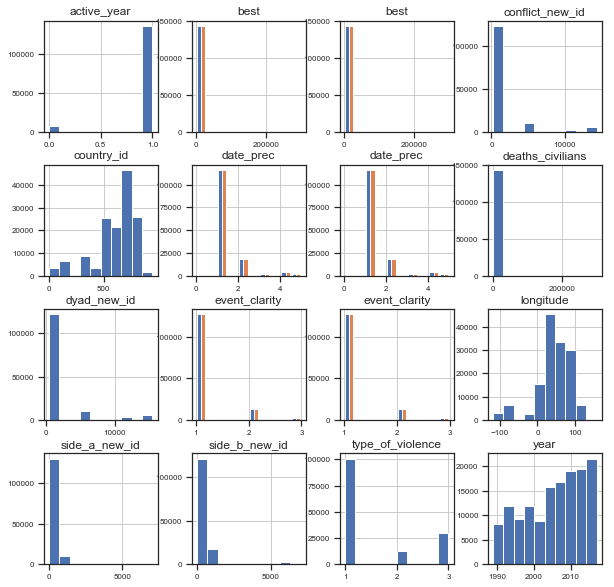

In [8]:
numerical_attributes = conflict_19_20.select_dtypes(include=['float64', 'int64'])
numerical_attributes.hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8);
conflict_19_20_corr=conflict_19_20.corr()['year'][:-1]
strong = conflict_19_20_corr[abs(conflict_19_20_corr) > 0].sort_values(ascending=False)
print("There is {} correlated values with Year:\n{}".format(len(strong), strong))

Text(0.5, 0, 'violence by year')

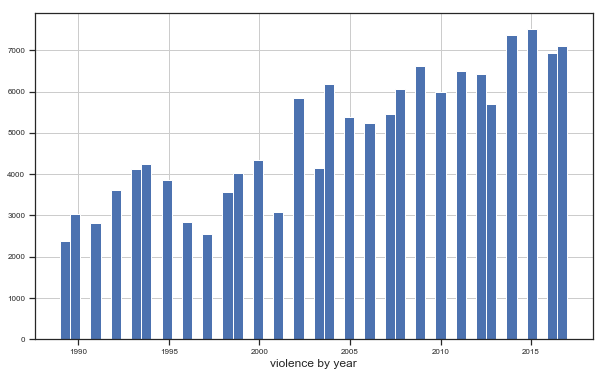

In [9]:
numerical_attributes.year.hist(figsize=(10, 6), bins=50, xlabelsize=8, ylabelsize=8)
plt.xlabel('violence by year')

In [10]:
# Plotting count plot for categorical values
categorical_attributes = conflict_19_20.select_dtypes(include=['object'])
categorical_attributes

,conflict_name,side_a,side_b,where_coordinates,country,region,date_start,date_end
0,Sikh insurgents - Civilians,Sikh insurgents,Civilians,Punjab State,India,Asia,1989-01-01,1989-01-01
1,India:Punjab/Khalistan,Government of India,Sikh insurgents,Punjab State,India,Asia,1989-01-01,1989-12-31
2,JVP - Civilians,JVP,Civilians,Deniyaya town,Sri Lanka,Asia,1989-01-13,1989-01-13
3,Supporters of IFP - Supporters of UDF,Supporters of IFP,Supporters of UDF,Mpumalanga town,South Africa,Africa,1989-01-18,1989-01-18
4,NDFB - Civilians,NDFB,Civilians,Sonitpur district,India,Asia,1992-10-20,1992-10-20
5,LTTE - Civilians,LTTE,Civilians,North Eastern,Sri Lanka,Asia,1989-02-11,1989-02-11
6,IFP - Civilians,IFP,Civilians,Nqutu town,South Africa,Africa,1993-11-07,1993-11-07
7,Supporters of ANC - Supporters of IFP,Supporters of ANC,Supporters of IFP,Durban town,South Africa,Africa,1989-02-19,1989-02-19
8,Philippines:Government,Government of Philippines,CPP,Abra province,Philippines,Asia,1989-03-01,1989-03-03
9,Mohajir - Pashtun,Mohajir,Pashtun,Karachi Town,Pakistan,Asia,1989-03-10,1989-03-14


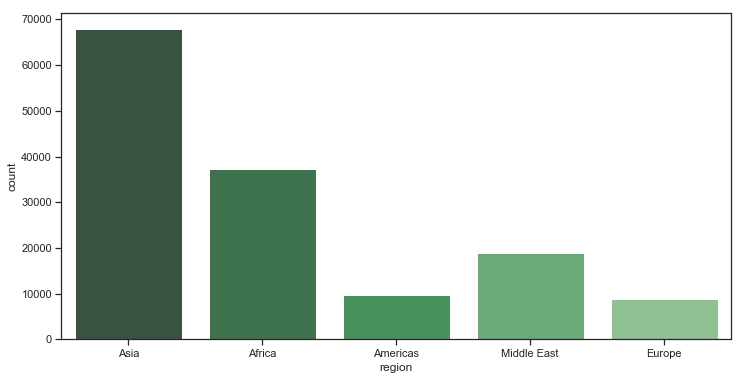

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'region', data = categorical_attributes, palette="Greens_d")

In [12]:
#conflict_19_20['date_start']=pd.to_datetime(conflict_19_20['date_start'], format='%Y-%m-%d')
#conflict_19_20['date_end']=pd.to_datetime(conflict_19_20['date_end'], format='%Y-%m-%d')
#conflict_19_20['HowManyDays']=abs(conflict_19_20['date_end']-conflict_19_20['date_start'])
#conflict_19_20=conflict_19_20.rename(columns={'active_year':'active_conf','date_prec':'event_report_frame','best':'death_number'})
#conflict_19_20['active_year']=conflict_19_20['active_year'].replace(1, 'Active Conflict').replace(2,'Not Active')
#conflict_19_20['event_clarity']=conflict_19_20['event_clarity'].replace(1, 'High').replace(2,'Low')
#conflict_19_20['date_prec']=conflict_19_20['date_prec'].replace(1, 'Exact Date').replace(2,'Within a 2-6 day range').replace(3,'Only the week of the event').replace(4,'Within an 8-30 day range or only the month').replace(5,'within a range longer than one month but not more than one calendar year.')

#### Total number of violence types

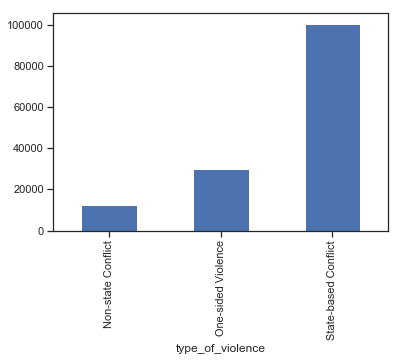

In [13]:
conflict_19_20['type_of_violence']=conflict_19_20['type_of_violence'].replace(1, 'State-based Conflict').replace(2,'Non-state Conflict').replace(3,'One-sided Violence')
TofV=conflict_19_20.groupby('type_of_violence').count()[['year']]
TofV['year'].plot(kind='bar')
plt.xlabel('type_of_violence')
plt.show()

#### Involved group/state A (first 10)

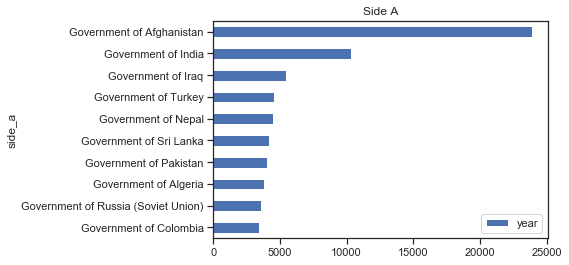

In [14]:
SideA=conflict_19_20.groupby('side_a').count()[['year']]
SideA.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Side A')
plt.show()

#### Involved group/state B (first 10)

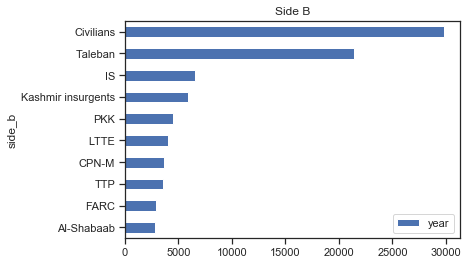

In [15]:
SideB=conflict_19_20.groupby('side_b').count()[['year']]
SideB.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Side B')
plt.show()

#### Where conflict happened (first 10)

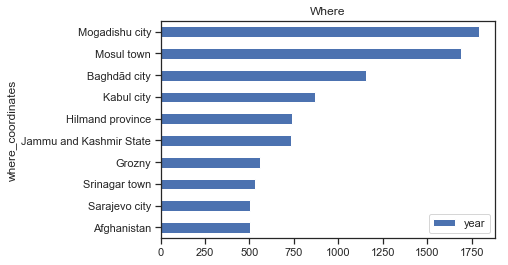

In [16]:
Where=conflict_19_20.groupby('where_coordinates').count()[['year']]
Where.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Where')
plt.show()

In [17]:
features = conflict.select_dtypes('number')
features.shape

(142902, 16)

#### Split Into Training and Testing Sets

In [18]:
targets = pd.DataFrame(conflict['longitude'])

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(100031, 16)
(42871, 16)
(100031, 1)
(42871, 1)


#### Establish a Baseline
##### Metric: Mean Absolute Error

In [19]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 45.87
Baseline Performance on the test set: MAE = 32.3763


This shows our average estimate on the test set is off by about 32 points. The scores are between 1 and 100 so this means the average error from a naive method if about 32%. The naive method of guessing the median training value provides us a low baseline for our models to beat!

In [20]:
print('Training Feature Size: ', X.shape)
print('Testing Feature Size:  ', X_test.shape)
print('Training Labels Size:  ', y.shape)
print('Testing Labels Size:   ', y_test.shape)

Training Feature Size:  (100031, 16)
Testing Feature Size:   (42871, 16)
Training Labels Size:   (100031, 1)
Testing Labels Size:    (42871, 1)


In [21]:
X.describe()

,year,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,longitude,country_id,event_clarity,date_prec,deaths_civilians,best,active_year,type_of_violence,event_clarity,date_prec,best
count,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000,100031.000000
mean,2005.407264,1369.342504,2054.364117,296.585808,504.237017,45.539838,609.562286,1.132519,1.315792,7.080825,15.661125,0.949236,1.502814,1.132519,1.315792,15.661125
std,8.086251,2970.388842,3464.004630,666.758887,983.666835,45.180329,187.916910,0.387902,0.793880,961.837995,982.814913,0.219517,0.815420,0.387902,0.793880,982.814913
min,1989.000000,205.000000,406.000000,3.000000,1.000000,-117.046450,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1999.000000,333.000000,735.000000,112.000000,209.000000,29.448776,517.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2007.000000,364.000000,792.000000,130.000000,303.000000,45.872400,666.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2012.000000,499.000000,974.000000,154.000000,488.000000,74.167293,750.000000,1.000000,1.000000,1.000000,6.000000,1.000000,2.000000,1.000000,1.000000,6.000000
max,2017.000000,14333.000000,15538.000000,7046.000000,7014.000000,155.896681,940.000000,3.000000,5.000000,300559.000000,300559.000000,1.000000,3.000000,3.000000,5.000000,300559.000000


In [22]:
X.head(10)

,year,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,longitude,country_id,event_clarity,date_prec,deaths_civilians,best,active_year,type_of_violence,event_clarity,date_prec,best
28156,1996,4835,5445,503,976,45.366667,520,1,1,0,1,1,2,1,1,1
72388,2006,11350,11991,143,1165,89.048186,771,1,1,0,2,1,1,1,1,2
71767,2006,364,792,141,325,74.167293,750,1,1,0,1,1,1,1,1,1
8375,1991,571,1038,532,1,-11.573330,451,1,2,2,2,1,3,1,2,2
117773,2014,259,524,116,234,44.277979,645,1,1,0,4,1,1,1,1,4
110085,2013,337,750,95,717,42.545365,520,1,1,0,0,1,1,1,1,0
136617,2017,14134,15288,3103,607,12.304250,475,1,1,0,3,1,2,1,1,3
115527,2014,11732,12414,4226,1,31.660480,626,1,1,3,3,1,3,1,1,3
87233,2009,467,934,89,1,28.916667,490,1,1,1,1,1,3,1,1,1
121741,2014,333,735,130,303,70.418793,700,1,1,0,5,1,1,1,1,5


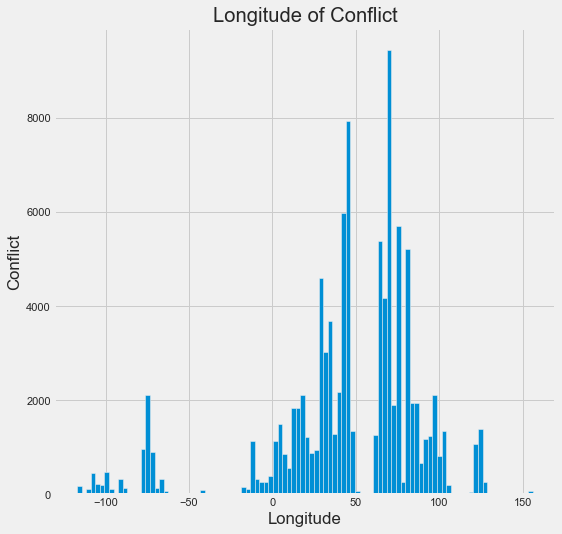

In [23]:
figsize(8, 8)

# Histogram of the Longitude
plt.style.use('fivethirtyeight')
plt.hist(y['longitude'], bins = 100);
plt.xlabel('Longitude'); plt.ylabel('Conflict'); 
plt.title('Longitude of Conflict');

# Evaluating and Comparing Machine Learning Models
We are comparing models using the __mean absolute error__. A baseline model that guessed the median value of the score was off by an __average of 25 points__. 

## Missing Values

In [24]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  year                0
conflict_new_id     0
dyad_new_id         0
side_a_new_id       0
side_b_new_id       0
longitude           0
country_id          0
event_clarity       0
date_prec           0
deaths_civilians    0
best                0
active_year         0
type_of_violence    0
event_clarity       0
date_prec           0
best                0
dtype: int64
Missing values in testing features:   year                0
conflict_new_id     0
dyad_new_id         0
side_a_new_id       0
side_b_new_id       0
longitude           0
country_id          0
event_clarity       0
date_prec           0
deaths_civilians    0
best                0
active_year         0
type_of_violence    0
event_clarity       0
date_prec           0
best                0
dtype: int64


In [25]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


#### Scaling Features

In [26]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

/Users/Mtnkgz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
print(X.shape)

(100031, 16)


In [28]:
# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

### Models to Evaluate
We will compare five different machine learning models using the great Scikit-Learn library:

1-Linear Regression

2-Support Vector Machine Regression

3-Random Forest Regression

4-Gradient Boosting Regression

5-K-Nearest Neighbors Regression

In [29]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [30]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.0000


In [31]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.0424


In [32]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

/Users/Mtnkgz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 0.0018


In [33]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.1832


In [34]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.9770


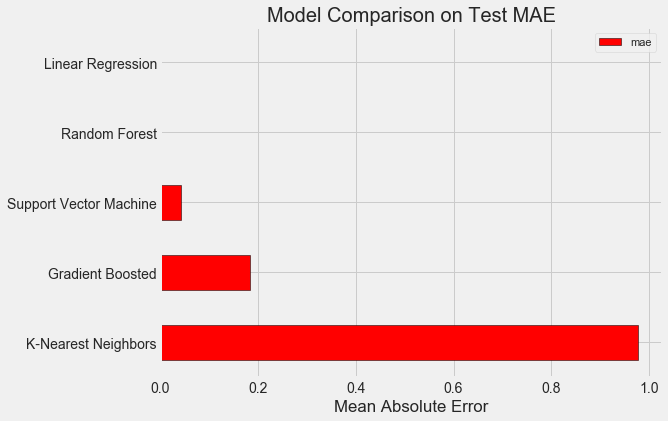

In [36]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

#Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                          'Random Forest', 'Gradient Boosted',
                                          'K-Nearest Neighbors'],
                                'mae': [lr_mae, svm_mae, random_forest_mae, 
                                        gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                         color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Depending on the run the Linear Regression and Random Forest performs the best followed by the Support Vector Machine. I will use Linear Regression as an model optimization.

#### Model Optimization
##### Hyperparameters

In [37]:
conflict.shape

(142902, 24)

In [38]:
conflict.describe()

,year,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,longitude,country_id,event_clarity,date_prec,deaths_civilians,best,active_year,type_of_violence,event_clarity,date_prec,best
count,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000,142902.000000
mean,2005.402171,1364.138654,2049.126842,296.619956,502.966439,45.583510,609.605205,1.131559,1.314768,6.020574,14.151160,0.949777,1.504269,1.131559,1.314768,14.151160
std,8.080041,2961.161722,3456.548629,667.636849,982.098868,45.097563,187.647685,0.386372,0.792758,811.901490,829.790097,0.218406,0.816606,0.386372,0.792758,829.790097
min,1989.000000,205.000000,406.000000,3.000000,1.000000,-117.300000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1999.000000,333.000000,735.000000,112.000000,209.000000,29.448776,517.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2007.000000,364.000000,792.000000,130.000000,303.000000,45.868586,666.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2012.000000,499.750000,974.000000,154.000000,488.000000,74.167293,750.000000,1.000000,1.000000,1.000000,6.000000,1.000000,2.000000,1.000000,1.000000,6.000000
max,2017.000000,14333.000000,15538.000000,7049.000000,7014.000000,155.896681,940.000000,3.000000,5.000000,300559.000000,300559.000000,1.000000,3.000000,3.000000,5.000000,300559.000000


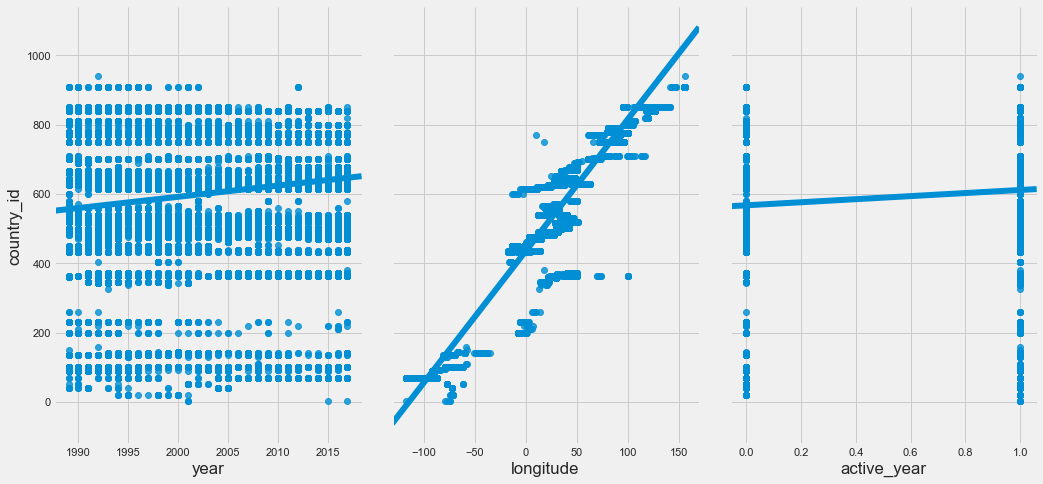

In [39]:
sns.pairplot(conflict, x_vars=['year','longitude','active_year'], y_vars='country_id', height=7, aspect=0.7, kind='reg')

There is a strong relationship between longitude and country_id 

In [40]:
X=conflict[['longitude']]
y=conflict[['country_id']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print(model.intercept_) 
print(model.coef_)

[435.83437668]
[[3.80887894]]


In [44]:
y_pred=model.predict(X_test)

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.00359651188603
Mean Squared Error: 5611.818054609487
Root Mean Squared Error: 74.91206881811159


The root mean squared error is 74.91, which is greater than the mean value of the longitude of all states which is 45.58. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy like we need more data, or we made the  bad assumption that this data has a linear relationship, but that might not be the case another reason might be the poor features we used may not have had a high enough correlation to the values we were trying to predict.